#  Data Wrangling

## Introduction

This step focuses on collecting data, cleaning it,organizing it, and making sure it's well defined. 

## Imports

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

C:\Users\Yan Zhang\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Yan Zhang\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Yan Zhang\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Objectives

What are fundamental questions we have in data wrangling?

What is the required target value?
Any potentially useful features?
What are the fundamental issues with the raw data?

## Load Data

In [2]:
# the supplied CSV data file is the raw_data directory
redwine_data = pd.read_csv('../data/raw/winequality-red.csv', sep=";")
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# load the white wine data to a dataframe
whitewine_data = pd.read_csv('../data/raw/winequality-white.csv', sep=";")
whitewine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Definition and Cleaning

In [4]:
#Call the info method on redwine_data to see a summary of the data
redwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Call the info method on whitewine_data to see a summary of the data
whitewine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Both data don't have missing values.

### Column names

The some column names are not in stanard format, need to rename them

In [6]:
redwine_data.columns = redwine_data.columns.str.replace(" ", "_")
print(redwine_data.columns)
whitewine_data.columns = whitewine_data.columns.str.replace(" ", "_")
print(whitewine_data.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Data Types

Wine quality is in range 0 to 10, the data type should be Category.

In [7]:
# change quality data type to catogrical
redwine_data["quality"] = redwine_data["quality"].astype("category")
whitewine_data["quality"] = whitewine_data["quality"].astype("category")
print(redwine_data["quality"].dtypes)
print(whitewine_data["quality"].dtypes)

category
category


## Data Duplication

In [8]:
#choose the subset using col_name
col_name = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]
#check the duplication in redwine_data
dup_red = redwine_data.duplicated(subset=col_name, keep=False)
redwine_data[dup_red]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [9]:
# drop duplicate data in redwine_data
redwine_data.drop_duplicates(subset=col_name, keep="first", inplace=True)

In [10]:
redwine_data.shape

(1359, 12)

In [11]:
redwine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


check duplication in whitewine_data 

In [12]:
whitewine_data.duplicated(subset=col_name, keep=False)

0        True
1        True
2        True
3        True
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [13]:
# drop duplicate data in whitewine_data
whitewine_data.drop_duplicates(subset=col_name, keep="first", inplace=True)

In [14]:
whitewine_data.shape

(3961, 12)

In [15]:
whitewine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


No missing values and duplication in both data frames. free_sulfur_dioxide, total_sulfur_dioxide show the largest std in both red and white wine. residual_sugar also show large std in bot wine. density and pH show relative low variation.

## Joint The Two Wine Data Set Into One DataFrame

In [16]:
wine_df = pd.concat([redwine_data, whitewine_data],
                    ignore_index=False,
                    keys=['red', 'white']).reset_index()

In [17]:
wine_df.head()
wine_df.tail()

,level_0,level_1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5315,white,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
5316,white,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
5317,white,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5318,white,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
5319,white,4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [18]:
wine_df.shape

(5320, 14)

In [19]:
wine_df.columns
wine_df.drop(wine_df.columns[[1]], inplace=True, axis=1)

wine_df.head()
wine_df.tail()

,level_0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5315,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
5316,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
5317,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5318,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
5319,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [20]:
#correct data type of quality column
wine_df["quality"] = whitewine_data["quality"].astype("category")

In [21]:
print(wine_df["quality"].dtypes)

category


In [22]:
wine_df1 = wine_df.rename(columns={'level_0': 'wine_type'})

In [23]:
wine_df1.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,6
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,6
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,NaN


In [24]:
wine_df1.shape

(5320, 13)

## Explore The Data

### Target Feature: Wine Quality

C:\Users\Yan Zhang\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


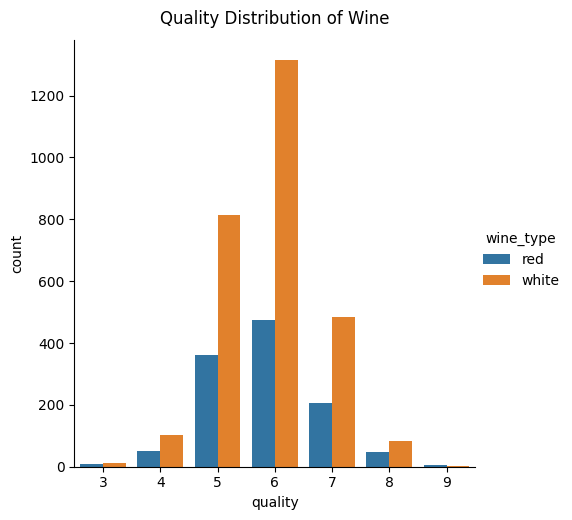

In [25]:
g = sns.catplot(x="quality", data=wine_df1, hue="wine_type", kind="count")
g.fig.suptitle("Quality Distribution of Wine", y=1.03)
plt.show()

In [26]:
wine_df1.groupby("wine_type")["quality"].value_counts(normalize=True)

wine_type  quality
red        6          0.411816
           5          0.312772
           7          0.178975
           4          0.044309
           8          0.041703
           3          0.006950
           9          0.003475
white      6          0.467616
           5          0.290036
           7          0.171886
           4          0.036299
           8          0.029537
           3          0.004270
           9          0.000356
Name: proportion, dtype: float64

For red wine, quality 5 and 6 are the dominate. high quality wine (>7) only occupy 4%; for white wine, quality 6 are the dominate one, high quliaty wine (>7) only occpy about 3%

### Visualize Numerical Features Relation with Quality

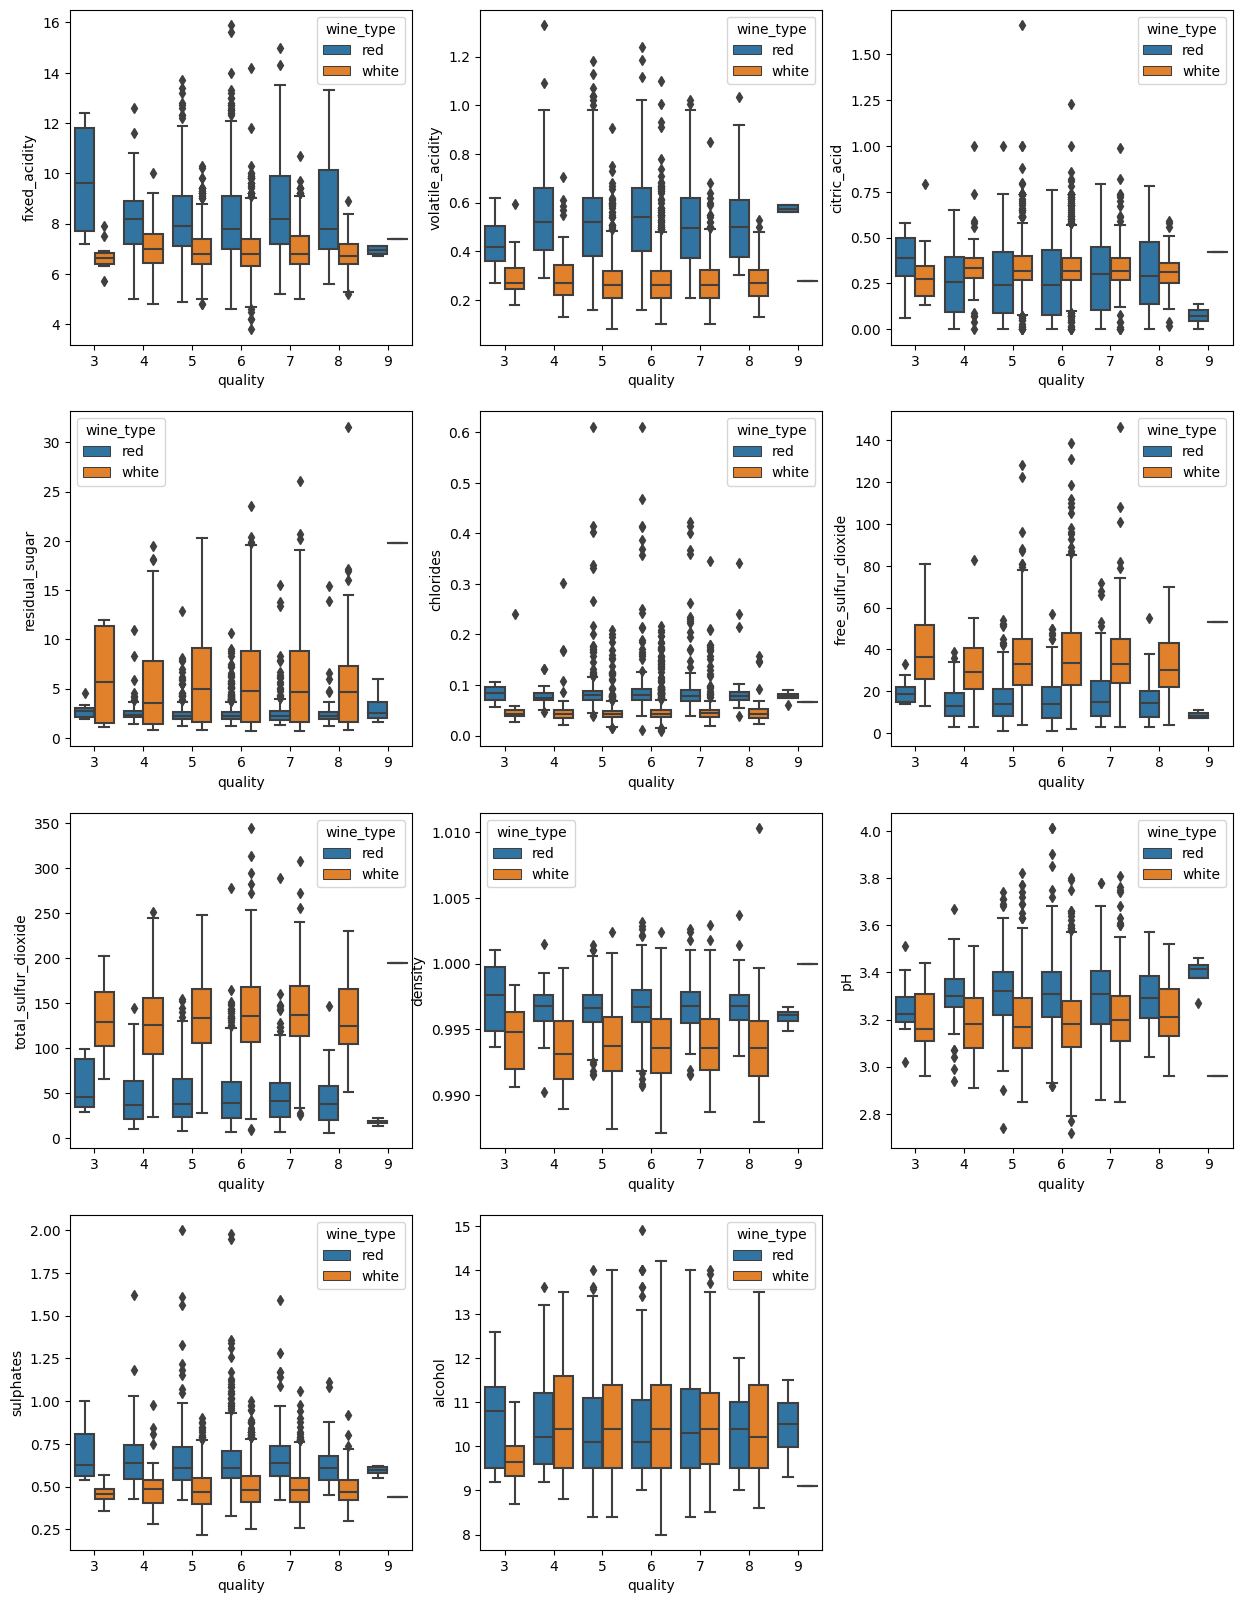

In [27]:
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
#fig.subplots_adjust(wspace=0.5, hspace=0.6)
ax = ax.flatten()
for i, col in enumerate(whitewine_data.columns[:-1]):
    sns.boxplot(x="quality", y=col, data=wine_df1, hue="wine_type", ax=ax[i])
    #ax.set_title(f"Distribution of {col} vs. Quality")
for empty in range(i + 1, 12):
    ax.flatten()[empty].set_visible(False)
plt.show()

Fixed_acidity, redisdual_sugar,chlorides, free_sulfur_dioxide, sulphates, alcohol show large outlines at quality 5.Seems like the big variation of these featrues could affect the wine quality significately. 

### Feature Explore

<Axes: >

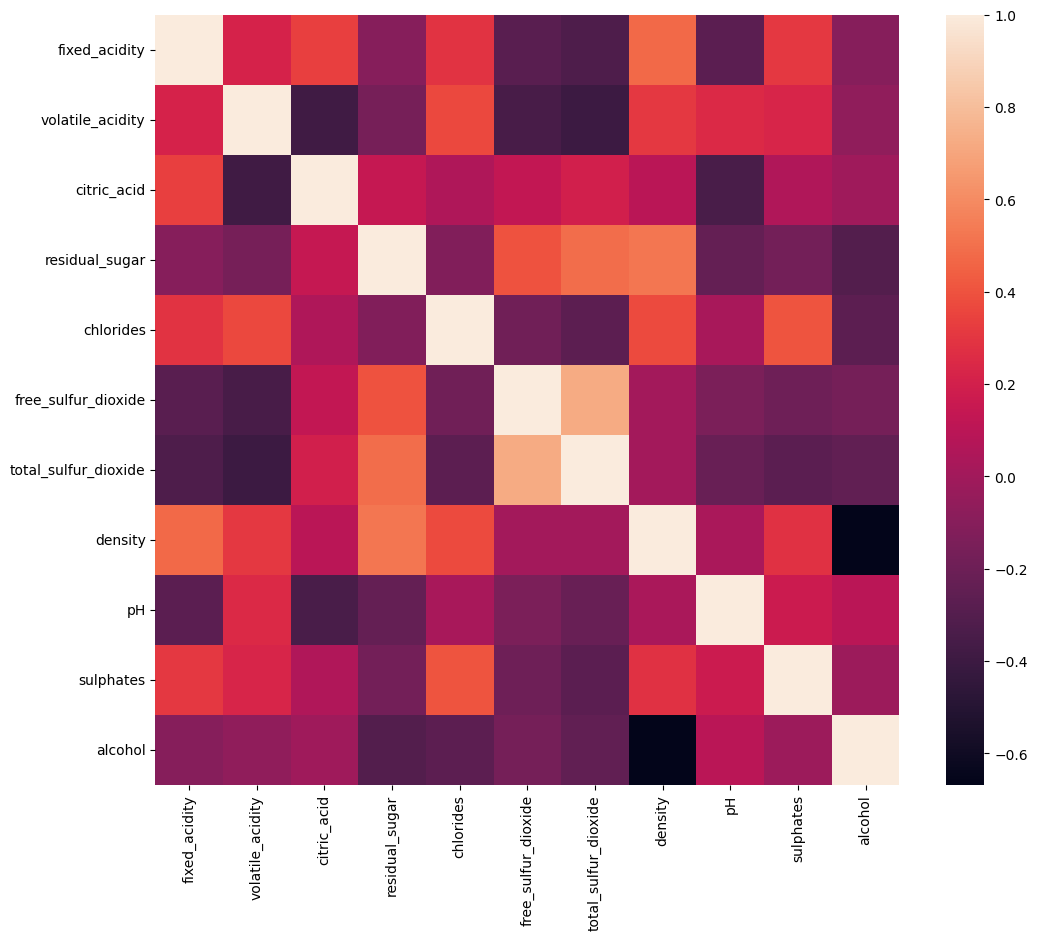

In [28]:
# seaborn heatmap to visulize the relationship among numeric features.
plt.subplots(figsize=(12, 10))
sns.heatmap(wine_df1.corr(numeric_only=True))

It shows strong positive correlation between "free_sulfur_dioxide" and "total_sulfur_dioxide", mild positive correlation between "residual_sugar" and "density". 
Strong negative correlation between "volatile_acidity" and "total_sulfur_dioxide";"volatile_acidity" and "free_sulfur_dioxide".

Add the ratio of 'free_sulfur_dioxide' to 'total_sulfur_dioxide' to dataframe.

In [29]:
wine_df1[
    "free_sulfur_dioxide_ratio"] = 100 * wine_df1.free_sulfur_dioxide / wine_df1.total_sulfur_dioxide

In [30]:
wine_df1.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_ratio
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6,32.352941
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,6,37.313433
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,6,27.777778
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333
4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,NaN,32.500000


In [31]:
# set catagorical feature "quality" as index
wine_df1.set_index("wine_type", inplace=True)

## Save Data

In [32]:
wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, red to white
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   fixed_acidity              5320 non-null   float64 
 1   volatile_acidity           5320 non-null   float64 
 2   citric_acid                5320 non-null   float64 
 3   residual_sugar             5320 non-null   float64 
 4   chlorides                  5320 non-null   float64 
 5   free_sulfur_dioxide        5320 non-null   float64 
 6   total_sulfur_dioxide       5320 non-null   float64 
 7   density                    5320 non-null   float64 
 8   pH                         5320 non-null   float64 
 9   sulphates                  5320 non-null   float64 
 10  alcohol                    5320 non-null   float64 
 11  quality                    3961 non-null   category
 12  free_sulfur_dioxide_ratio  5320 non-null   float64 
dtypes: category(1), float64(12)
memory 

In [33]:
wine_df1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_ratio
wine_type,,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6,32.352941
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,6,37.313433
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,6,27.777778
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333
red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,NaN,32.500000


In [34]:
import os

outname = 'wine_df_cleaned.csv'

outdir = '../data/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)

wine_df1.to_csv(fullname)

In [37]:
wine_df2 = pd.read_csv("../data/wine_df_cleaned.csv", index_col = "wine_type")
wine_df2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_ratio
wine_type,,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,6.0,32.352941
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,6.0,37.313433
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,6.0,27.777778
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,28.333333
red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,NaN,32.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,NaN,26.086957
white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,NaN,33.928571
white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,NaN,27.027027


## Summary

In this data wrangling, it starts with two data sets red wine and white wine. The raw data sets have no missing values. 
Key processes were performed:
    1. data duplication. Both red and wine data have some duplicated values and were removed before join the two data sets.
    2. The data type of "quality" was corrected into "category".
    3. Joined red and white wine data into one data frame.
    4. The research target "qualtiy" distribution was analyszed.
    5. visualized the distribution of quality with each numeric feature.
    6. add free_sulfur_dioxide_ratio into dataframe for furture analysis.
    